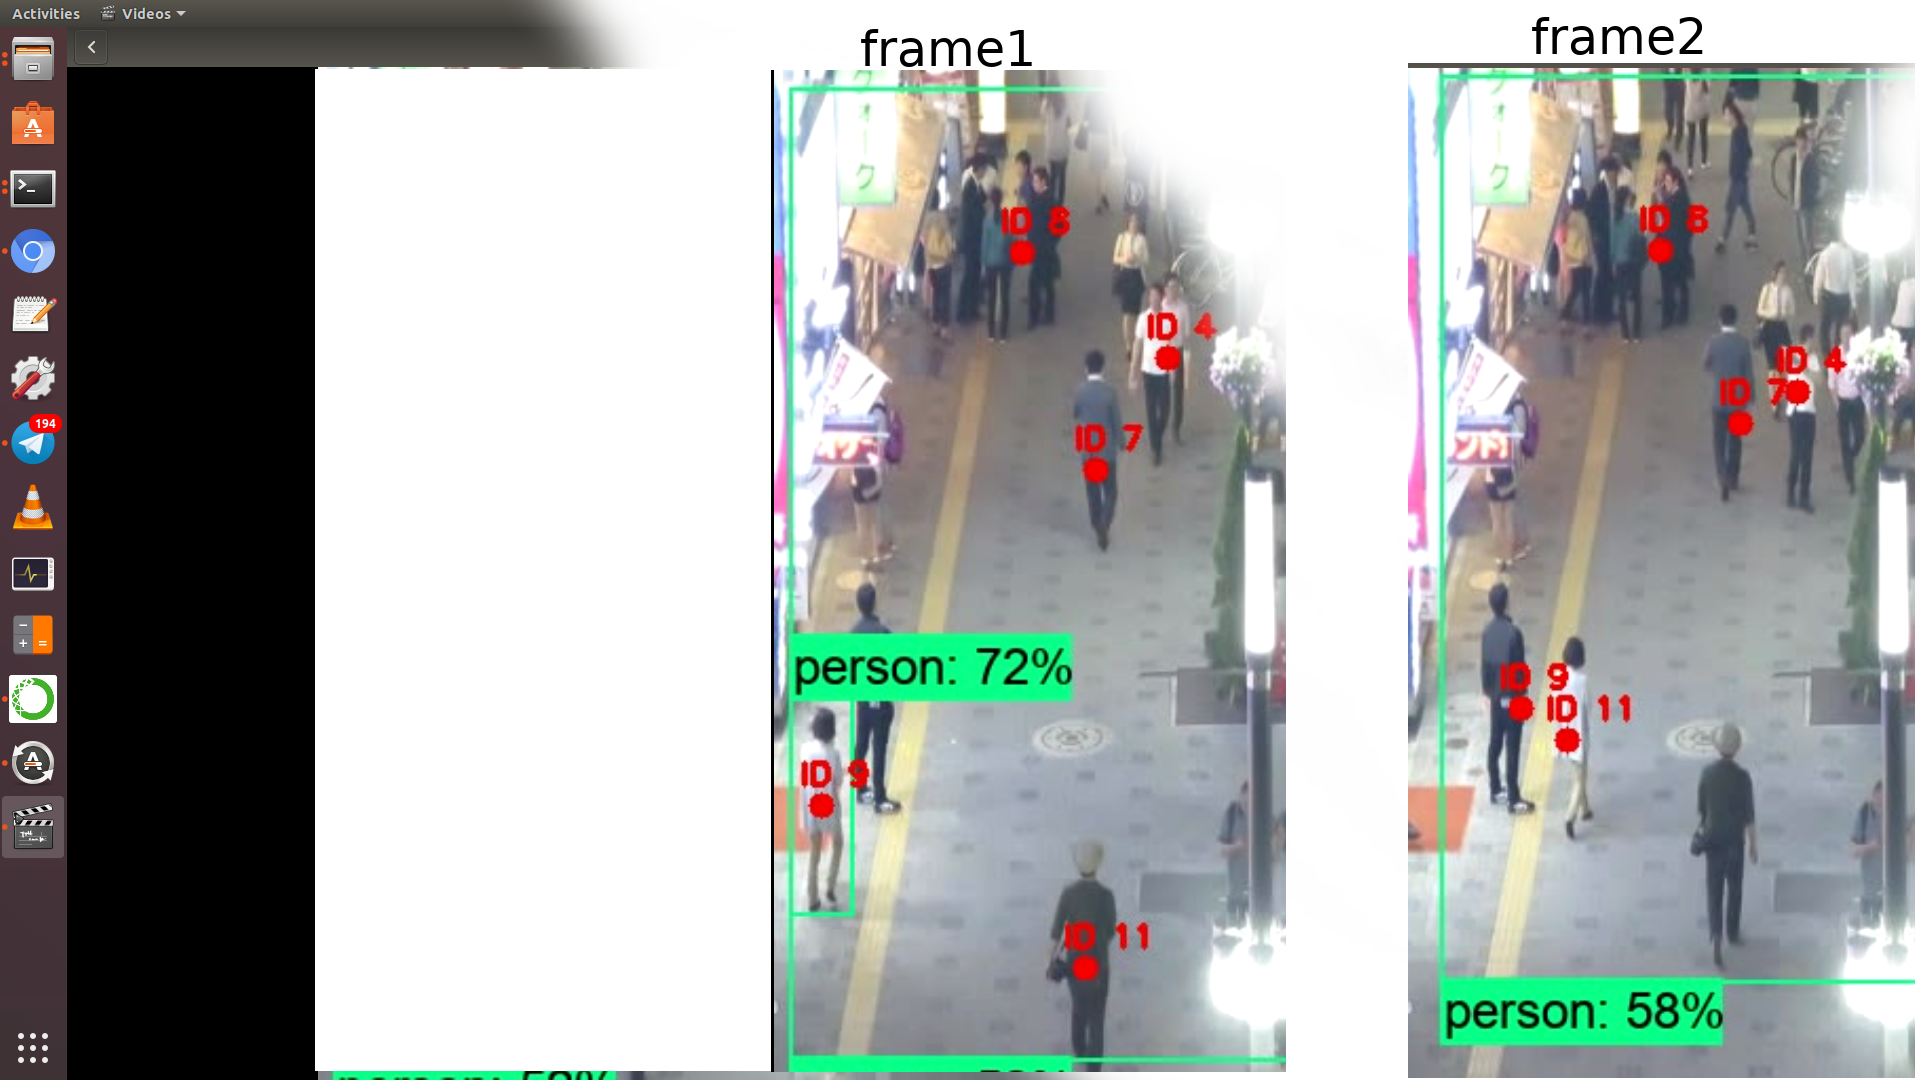

In [ ]:
По метрике такие мысли. Она должна:
    1) быть понятна
    2) быть легко подсчитана без большого ручного труда
    3) не должна включать ошибку детектора (отсутствие распознавания). Но вот ложные срабатывания вряд ли получится исключить. Ну и ладно
    4) Как-то жестко агрегироваться по всем кадрам. Например, суммарная ошибка равна максимальной ошибке между кадрами. 

Метрика считается из двух соседних кадров. Я взял для примера не соседние (чтобы была разница)


In [1]:
import numpy as np
import pandas as pd

In [28]:
GT = pd.Series([4,7,8,9,11,12])
#GT = np.array([0,4,7,8,9,11,12], int)

pred=pd.Series([4,7,8,11,0,9])
#pred=np.array([0,4,7,8,11,0,9], int)
#новая детекция (неподвижный человек спиной с руками в карманах) назван мной 12 в GT 
# к нему прилепился номер 9.
#От того, который был 11 на первом кадре трекер перепрыгнул к девушке в белом, 
#а с нее на нового с руками в карманах.

In [3]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report#, recall_score, accuracy_score, precision_score#, f1

In [21]:
confusion_matrix(GT, pred)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0]])

In [22]:
print(classification_report(GT, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1

   micro avg       0.50      0.50      0.50         6
   macro avg       0.43      0.43      0.43         6
weighted avg       0.50      0.50      0.50         6



грубо говоря 6 человек на этих кусочках задетектились суммарно
3 окошка показывают тех же людей, 3 перепутались. Средние точности по 50%
как это посчитать не вручную - непонятно. 

для визуального контроля, нужно рисовать разноцветные хвосты к каждому трекеру, чтобы видно было следы движения. Если следа нет - значит или нет движения или детекция была принята за новый объект. Как здесь https://www.youtube.com/watch?v=dKpRsdYSCLQ&list=PLEntZLI6s-hkkoBdnWF2PteSzfN6Yu8IW&index=15&t=0s

Про метрику если упростить - можно придумать такую формулу. Например, человек посчитал, что на видео было суммарно по всем кадрам 5 человек (y_test). Трекер выдал 6 id (y_pred). Точность = 1-abs(y_pred-y_test)/y_test=1-(6-5)/5=0.8. Правда, для примера выше точность будет 100% хотя внутри там косяки

In [ ]:
#дальше не читайте. Красивости с confusion matrix

Confusion matrix, without normalization
[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]]
Normalized confusion matrix
[[nan nan nan nan nan nan nan]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]]


/home/zamarseny/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


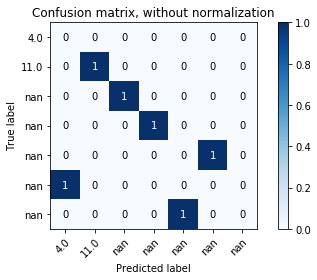

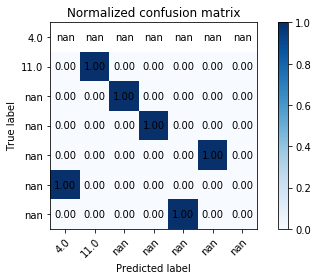

In [29]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
'''
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

'''

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(GT, pred, classes=GT, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(GT, pred, classes=GT, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
#Total running time of the script: ( 0 minutes 0.100 seconds)

